Problem 1a: Load the SpotifyFeatures.csv file and report the number of samples (songs) as well as the number of features (song properties) in the dataset. Hint: you may use the Python module and its function read.csv.

In [2]:
"Problem 1a"
import pandas as pd

# Load the CSV file
data = pd.read_csv('Spotifyfeatures.csv')

# Find the number of songs and song properties
num_samples, num_features = data.shape

# Print the results
print(f'Number of samples: {num_samples}')
print(f'Number of features: {num_features}')

Number of samples: 232725
Number of features: 18


Problem 1b: You will be working with samples from two genres namely 'Pop' and 'Classical'. Retrieve all samples belonging to the two genres and create labels for the samples i.e. 'Pop' = 1 and 'Classical' = 0. Report how many samples belongs to the two classes. Working with all the features is not always the best solution since it increases the computational cost and some of them may be useless for the task. For this dataset you should separate the two classes by using to features, namely 'liveness' and 'loudness'.

In [21]:
"Problem 1b"
# Define the two genres
genres_of_interest = ['Pop', 'Classical']

# Filter the Dataframe for the two genres
filtered_data = data.loc[data['genre'].isin(genres_of_interest)].copy()

# Create labels for samples
# 'Pop' is labeled as 1 and 'Classical' is labeled as 0
filtered_data['label'] = filtered_data['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# Report the number of samples in each genre
genre_counts = filtered_data['genre'].value_counts()

# Print the results
print('Number of samples for each genre: ')
for genre, count in genre_counts.items():
    print(f'{genre}: {count}')

# Extract features and labels
X = filtered_data[['liveness', 'loudness']].values
y = filtered_data['label'].values

# Separate the two classes
pop_indices = np.where(y == 1)
classical_indices = np.where(y == 0)



Number of samples for each genre: 
Pop: 9386
Classical: 9256


Problem 1c: From the reduced dataset, make 2 numpy arrays. The first array will be the matrix with songs along the rows and songs' features (liveness and loudness) as columns. This will be the input of our machine learning method. The second array will vector with the songs' genre (labels or target we want to learn). Create a training and test set by splitting the dataset. Use an 80% 20% split between the training and test set. Split the data per class so that you keep the same class distribution in the training and test set.

In [22]:
"Problem 1c"
import numpy as np

# Extract the relevant features (liveness and loudness)
features = filtered_data[['liveness', 'loudness']]

# Convert the features to a Numpy array
features_array = features.to_numpy()

# Extract the labels 
labels = filtered_data['label']

# Convert the labels to a Numpy array
labels_array = labels.to_numpy()  

# Shuffle the data
np.random.seed(42) # For reproducibility
indices = np.arange(features_array.shape[0])
np.random.shuffle(indices)

features_array = features_array[indices]
labels_array = labels_array[indices]

# Calculate the split index
split_index = int(0.8 * features_array.shape[0])

# Split the dato into training and test set
X_train = features_array[:split_index]
X_test = features_array[split_index:]
y_train = labels_array[:split_index]
y_test = labels_array[split_index:]

# Print the shapes of the resulting arrays to verify the split
print("Training set features shape:", X_train.shape)
print("Test set features shape:", X_test.shape)
print("Training set labels shape:", y_train.shape)
print("Test set labels shape:", y_test.shape)

# Verify the class distribution in the training and test ssets
print("Training set class distribution:", np.bincount(y_train))
print("Test set class distribution:", np.bincount(y_test))


Training set features shape: (14913, 2)
Test set features shape: (3729, 2)
Training set labels shape: (14913,)
Test set labels shape: (3729,)
Training set class distribution: [7423 7490]
Test set class distribution: [1833 1896]


Problem 1d: Plot the samples on the liveness vs loudness plane, with a different color for each class. From the plot, will the classification be an easy task? Why?

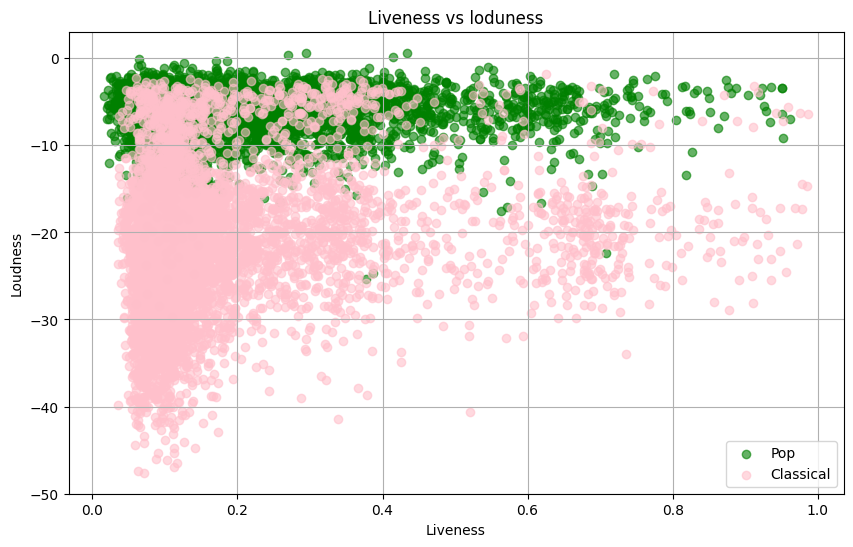

In [23]:
"Probelm 1d"
import matplotlib.pyplot as plt

# PLot the training data
plt.figure(figsize=(10, 6))

# Plot 'Pop' samples
pop_indices = np.where(y_train == 1)
plt.scatter(X_train[pop_indices, 0], X_train[pop_indices, 1], color='green', label='Pop', alpha=0.6)

# Plot 'Classical' samples
classical_indices = np.where(y_train == 0)
plt.scatter(X_train[classical_indices, 0], X_train[classical_indices, 1], color='pink', label='Classical', alpha=0.6)

# Add labels and title
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Liveness vs loduness')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Problem 2a: The task is to classify the songs as 'Pop' or 'Classical'. 
Implement your own logistic discrimination classifier and use the training data to train the classifier. You should use stochastic descent and implement it in Python. Plot the training errors as a function of epochs, and report the accuracy on the training set. Try different learning rates for the gradient descent and explain what you observe for these different values. Optional, it may help the learning process if the data is shuffled (songs are fed to the classifier in random order).

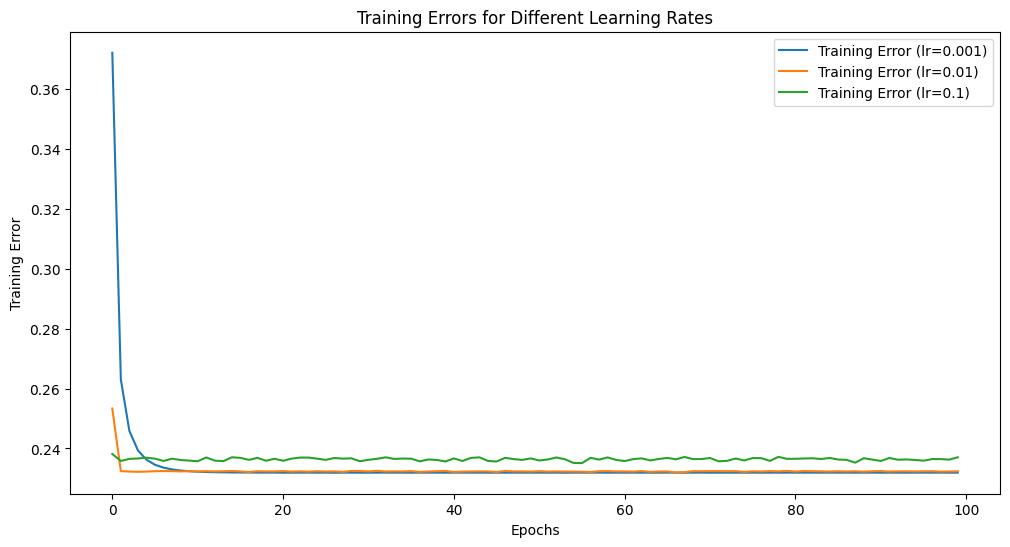

Training Accuracy: 92.77%


In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('SpotifyFeatures.csv')

# Preprocess the data
# Filter the DataFrame for the two genres
genres_of_interest = ['Pop', 'Classical']
filtered_data = data.loc[data['genre'].isin(genres_of_interest)].copy()

# Create labels for samples
# 'Pop' is labeled as 1 and 'Classical' is labeled as 0
filtered_data['label'] = filtered_data['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# Normalize the features
filtered_data[['liveness', 'loudness']] = (filtered_data[['liveness', 'loudness']] - filtered_data[['liveness', 'loudness']].mean()) / filtered_data[['liveness', 'loudness']].std()

# Extract features and labels
X = filtered_data[['liveness', 'loudness']].values
y = filtered_data['label'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Classifier with SGD
class LogisticRegressionSGD:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.train_errors = []  # Initialize train_errors

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            epoch_error = 0
            # Shuffle the data at the beginning of each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            for i in range(n_samples):
                xi = X_train[i]
                yi = y_train[i]

                # Compute the linear model
                linear_model = np.dot(xi, self.weights) + self.bias
                y_predicted = sigmoid(linear_model)

                # Compute the gradient
                error = y_predicted - yi
                dw = error * xi
                db = error

                # Update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                # Accumulate training error for the epoch
                epoch_error += -yi * np.log(y_predicted) - (1 - yi) * np.log(1 - y_predicted)

            # Average errors for the epoch
            self.train_errors.append(epoch_error / n_samples)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)
    def predict(self, X):
        y_predicted = self.predict_proba(X)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])
    
# Define different learning rates to compare
learning_rates = [0.001, 0.01, 0.1]

# Plot training errors for different learning rates
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    classifier = LogisticRegressionSGD(learning_rate=lr, epochs=100)
    classifier.fit(X_train, y_train)
    
    plt.plot(classifier.train_errors, label=f'Training Error (lr={lr})')

plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Errors for Different Learning Rates')
plt.legend()
plt.show()

# Report accuracy on the training set
y_pred_train = classifier.predict(X_train)
accuracy = np.mean(y_pred_train == y_train)
print(f'Training Accuracy: {accuracy * 100:.2f}%')

Problem 2b: Test your trained logistic discrimination classifier using the test set. Report the accuracy on the test set. is there a significant difference between the accuracy on the training and the test set? If so, what might that indicate? 

Test Accuracy: 92.25%
Training Accuracy: 92.73%
There is no significant difference between training and test accuracy


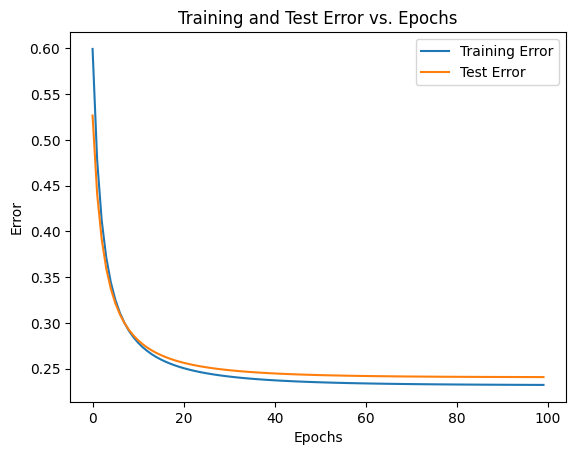

In [52]:
"Problem 2b"
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('SpotifyFeatures.csv')

# Preprocess the data
# Filter the DataFrame for the two genres
genres_of_interest = ['Pop', 'Classical']
filtered_data = data.loc[data['genre'].isin(genres_of_interest)].copy()

# Create labels for samples
# 'Pop' is labeled as 1 and 'Classical' is labeled as 0
filtered_data['label'] = filtered_data['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# Normalize the features
filtered_data[['liveness', 'loudness']] = (filtered_data[['liveness', 'loudness']] - filtered_data[['liveness', 'loudness']].mean()) / filtered_data[['liveness', 'loudness']].std()

# Extract features and labels
X = filtered_data[['liveness', 'loudness']].values
y = filtered_data['label'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Classifier with SGD
class LogisticRegressionSGD:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.train_errors = [] # Initialize train_errors
        self.test_errors = [] # Initialize test_erroros
    
    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            epoch_error = 0
            epoch_test_error = 0
            # Shuffle the data at the beginning of each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            for i in range(n_samples):
                xi = X_train[i]
                yi = y_train[i]

                # Compute the linear model
                linear_model = np.dot(xi, self.weights) + self.bias
                y_predicted = sigmoid(linear_model)

                # Compute the gradient
                error = y_predicted - yi
                dw = error * xi
                db = error

                # Update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

                # Accumulate training error for the epoch
                epoch_error += -yi * np.log(y_predicted) - (1 - yi) * np.log(1 - y_predicted)

            # Calculate test error for the epoch
            y_test_pred = self.predict_proba(X_test)
            epoch_test_error = np.mean(-y_test * np.log(y_test_pred) - (1 - y_test) * np.log(1 - y_test_pred))


            # Average errors for the epoch
            self.train_errors.append(epoch_error / n_samples)
            self.test_errors.append(epoch_test_error)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)
    
    def predict(self, X):
        y_predicted = self.predict_proba(X)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])
    
# Initialize and train the classifier on the training set
classifier = LogisticRegressionSGD(learning_rate=0.0001, epochs=100)
classifier.fit(X_train, y_train, X_test, y_test)

# Predict on the test set
y_pred_test = classifier.predict(X_test)

# Report accuracy on the test set
test_accuracy = np.mean(y_pred_test == y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Compare with training accuracy
y_pred_train = classifier.predict(X_train)
train_accuracy = np.mean(y_pred_train == y_train)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Check for signinficant difference between training and test accuracy
if abs(train_accuracy - test_accuracy) > 0.05:
    print("There is a significant difference between training and test accuracy")
else:
    print("There is no significant difference between training and test accuracy")

# Plot training and test errors
plt.plot(range(classifier.epochs), classifier.train_errors, label='Training Error')
plt.plot(range(classifier.epochs), classifier.test_errors, label='Test Error')  
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Test Error vs. Epochs')
plt.legend()
plt.show()


Problem 2c: Extract the learned parameter from your logistic regression and use them to draw the linear line separating the data you made in quiestion 1d. This may help you understand why your classifier is performing well or not.

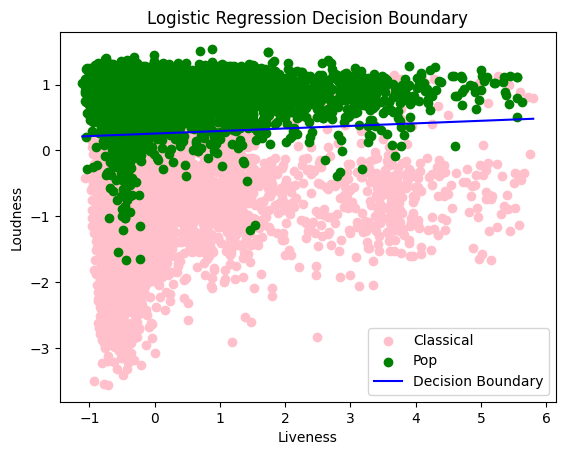

In [48]:
"Problem 2c"
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
   # Uses sklearn for splitting the dataset into training an test sets

# Load the dataset
data = pd.read_csv('SpotifyFeatures.csv')

# Preprocess the data
# Filter the DataFrame for the two genres
genres_of_interest = ['Pop', 'Classical']
filtered_data = data.loc[data['genre'].isin(genres_of_interest)].copy()

# Create labels for samples
# 'Pop' is labeled as 1 and 'Classical' is labeled as 0
filtered_data['label'] = filtered_data['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# Normalize the features
filtered_data[['liveness', 'loudness']] = (filtered_data[['liveness', 'loudness']] - filtered_data[['liveness', 'loudness']].mean()) / filtered_data[['liveness', 'loudness']].std()

# Extract features and labels
X = filtered_data[['liveness', 'loudness']].values
y = filtered_data['label'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Classifier with SGD
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.train_errors = []  # Initialize train_errors
        self.test_errors = []   # Initialize test_errors
    
    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            epoch_error = 0
            epoch_test_error = 0
            # Shuffle the data at the beginning of each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            for i in range(n_samples):
                xi = X_train[i]
                yi = y_train[i]

                # Compute the linear model
                linear_model = np.dot(xi, self.weights) + self.bias
                y_predicted = sigmoid(linear_model)

                # Compute the gradient
                error = y_predicted - yi
                dw = error * xi
                db = error

                # Update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

                 # Accumulate training error for the epoch
                epoch_error += -yi * np.log(y_predicted) - (1 - yi) * np.log(1 - y_predicted)

            # Calculate test error for the epoch
            y_test_pred = self.predict_proba(X_test)
            epoch_test_error = np.mean(-y_test * np.log(y_test_pred) - (1 - y_test) * np.log(1 - y_test_pred))

            # Average errors for the epoch
            self.train_errors.append(epoch_error / n_samples)
            self.test_errors.append(epoch_test_error)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)
    
    def predict(self, X):
        y_predicted = self.predict_proba(X)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])
    
# Initialize and train the classifier on the training set
classifier = LogisticRegressionSGD(learning_rate=0.01, epochs=1000)
classifier.fit(X_train, y_train, X_test, y_test)

# Extract the learned parameters
weights = classifier.weights
bias = classifier.bias

# Plot the data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='pink', label='Classical')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='green', label='Pop')

# Calculate the decision boundary
x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = -(weights[0] * x_values + bias) / weights[1]

# Plot the decision boundary
plt.plot(x_values, y_values, label='Decision Boundary', color='blue')

# Add labels and legend
plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()



Problem 3a: We need a machine which does not make too many errors. Using the classification results from the test set in problem 2b, create a confusion matric for the classifiaction. Report the confusin matrix.

Confusion Matrix:
[[1653  217]
 [  75 1784]]


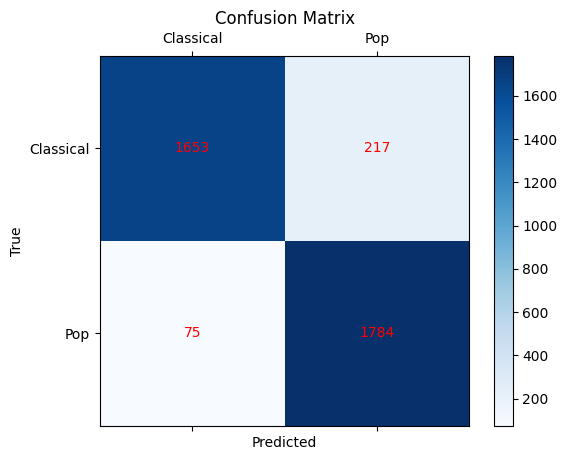

In [49]:
"Problem 3a"
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('SpotifyFeatures.csv')

# Preprocess the data
# Filter the DataFrame for the two genres
genres_of_interest = ['Pop', 'Classical']
filtered_data = data.loc[data['genre'].isin(genres_of_interest)].copy()

# Create labels for samples
# 'Pop' is labeled as 1 and 'Classical' is labeled as 0
filtered_data['label'] = filtered_data['genre'].apply(lambda x: 1 if x == 'Pop' else 0)

# Normalize the features
filtered_data[['liveness', 'loudness']] = (filtered_data[['liveness', 'loudness']] - filtered_data[['liveness', 'loudness']].mean()) / filtered_data[['liveness', 'loudness']].std()

# Extract features and labels
X = filtered_data[['liveness', 'loudness']].values
y = filtered_data['label'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Classifier with SGD
class LogisticRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.train_errors = []  # Initialize train_errors
        self.test_errors = []   # Initialize test_errors
    
    def fit(self, X_train, y_train, X_test, y_test):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            epoch_error = 0
            epoch_test_error = 0
            # Shuffle the data at the beginning of each epoch
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            for i in range(n_samples):
                xi = X_train[i]
                yi = y_train[i]

                # Compute the linear model
                linear_model = np.dot(xi, self.weights) + self.bias
                y_predicted = sigmoid(linear_model)

                # Compute the gradient
                error = y_predicted - yi
                dw = error * xi
                db = error

                # Update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

                # Accumulate training error for the epoch
                epoch_error += -yi * np.log(y_predicted) - (1 - yi) * np.log(1 - y_predicted)

            # Calculate test error for the epoch
            y_test_pred = self.predict_proba(X_test)
            epoch_test_error = np.mean(-y_test * np.log(y_test_pred) - (1 - y_test) * np.log(1 - y_test_pred))

            # Average errors for the epoch
            self.train_errors.append(epoch_error / n_samples)
            self.test_errors.append(epoch_test_error)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)
    
    def predict(self, X):
        y_predicted = self.predict_proba(X)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])
    
# Initialize and train the classifier on the training set
classifier = LogisticRegressionSGD(learning_rate=0.01, epochs=1000)
classifier.fit(X_train, y_train, X_test, y_test)

# Predict on the test set
y_pred_test = classifier.predict(X_test)

# Manually create the confusion matrix
conf_matrix = np.zeros((2, 2), dtype=int)

for true_label, pred_label in zip(y_test, y_pred_test):
    conf_matrix[true_label, pred_label] += 1

# Report the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix with titles and labels
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Classical', 'Pop'])
ax.set_yticklabels(['Classical', 'Pop'])

plt.xlabel('Predicted')
plt.ylabel('True')

for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')

plt.show()